In [1]:
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [2]:
test_img=np.load('/home/lab/MPII_COCO/COCO_Dataset/train2017/list_1_img.npy')
test_kp=np.load('/home/lab/MPII_COCO/COCO_Dataset/train2017/list_1_kp.npy')

In [3]:
def make_resize(img,kp):
    new_list_img=[]
    new_list_kp=[]
    for n,i in enumerate(tqdm(img)):
        time.sleep(0.000000000001)
        no_x=150/i.shape[1]
        no_y=250/i.shape[0]
        reimg=cv2.resize(i,dsize=(150,250),interpolation=cv2.INTER_AREA)
        new_list_kp1=[]
        for j in kp[n]:
            if j[2]!=0:
                j[0]=int(j[0]*no_x)
                j[1]=int(j[1]*no_y)
            new_list_kp1.append(j)
        new_list_kp.append(new_list_kp1)
        new_list_img.append(reimg)
    new_list_img=np.array(new_list_img)
    new_list_kp=np.array(new_list_kp)
    return new_list_img,new_list_kp

In [4]:
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
import time

In [5]:
import cv2
new_img,new_kp=make_resize(test_img,test_kp)

100%|██████████| 7127/7127 [00:02<00:00, 2807.50it/s]


In [6]:
new_img.shape, new_kp.shape

((7127, 250, 150, 3), (7127, 17, 3))

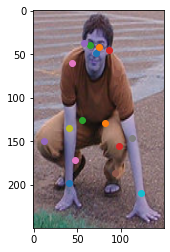

In [9]:
import matplotlib.pyplot as plt
plt.imshow(new_img[2000])
for i in new_kp[2000]:
    plt.scatter(i[0],i[1])

In [10]:
np.save('/home/lab/양창희/Pose Estimation/Dataset/COCO/Train2017/image1.npy',new_img)
np.save('/home/lab/양창희/Pose Estimation/Dataset/COCO/Train2017/kp1.npy',new_kp)

In [11]:
img1=np.load('/home/lab/양창희/Pose Estimation/Dataset/COCO/Train2017/image1.npy')

In [12]:
img1.shape

(7127, 250, 150, 3)